# Session 14

## Visualization 10: Violin Plot - Sales Distribution by Customer Type: 
Comparing the distribution of sales amounts for different customer types using a violin plot.


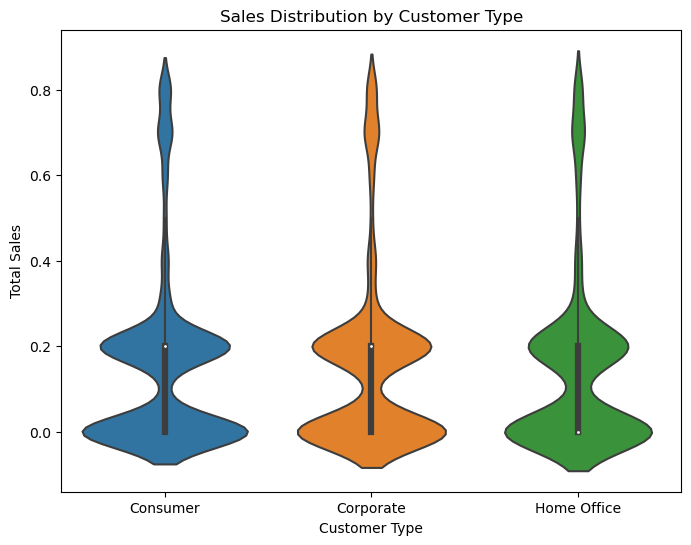

In [ ]:
plt.figure(figsize=(8, 6)) 

sns.violinplot(x='Segment', y='Discount', data=df)

plt.xlabel('Customer Type') 
plt.ylabel('Total Sales') 
plt.title('Sales Distribution by Customer Type') 
plt.show()

![image.png](attachment:image.png)

## Visualization 11: Clustered Bar Chart - Sales by Product Category and Gender:
Displaying sales counts based on product category and Gender using a clustered bar chart.

In [ ]:
df.sample()

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
4245,4246,2017-11-28,2017-12-04,Standard Class,LS-16975,Lindsay Shagiari,Home Office,United States,Baltimore,Maryland,21215,East,OFF-AR-10004582,Office Supplies,Art,BIC Brite Liner Grip Highlighters,1.64,1,0.0,0.738


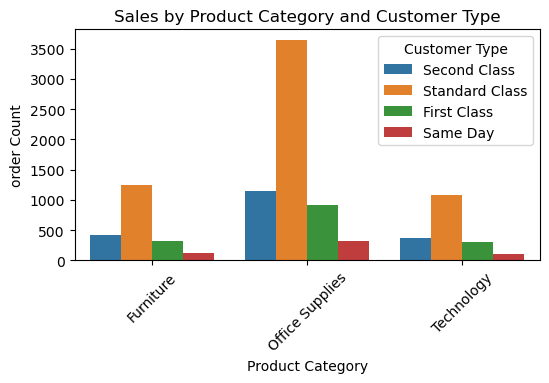

In [ ]:
plt.figure(figsize=(6,3)) 

sns.countplot(x='Category', hue='Ship Mode', data=df)

plt.xlabel('Product Category') 
plt.ylabel('order Count') 
plt.title('Sales by Product Category and Customer Type') 
plt.xticks(rotation=45) 
plt.legend(title='Customer Type') 
plt.show()

## Visualization 12: Donut Chart - Sales Distribution by Product Category: 
Illustrating the percentage distribution of sales among different product categories using a donut chart.

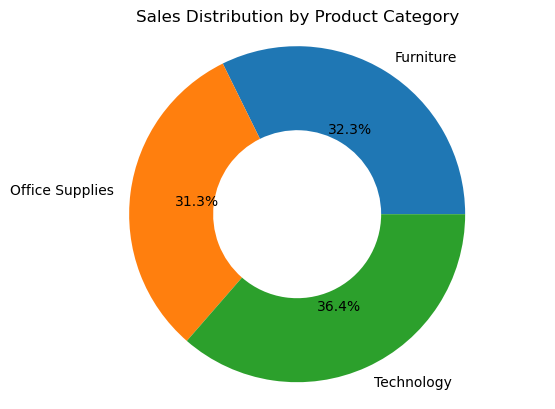

In [ ]:
product_category_sales = df.groupby('Category')['Sales'].sum()

plt.pie(product_category_sales,
        labels=product_category_sales.index,
        autopct='%1.1f%%', 
        wedgeprops=dict(width=0.5)
               ) 

plt.title('Sales Distribution by Product Category') 
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle. 
plt.show()

## Visualization 13: Word Cloud - Most Frequent Product Categories: 

Generating a word cloud to visualize the most frequent product categories based on their occurrences.

In [ ]:
df.sample()

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
3181,3182,2017-11-09,2017-11-12,Second Class,BM-11650,Brian Moss,Corporate,United States,Columbia,Maryland,21044,East,OFF-BI-10004728,Office Supplies,Binders,Wilson Jones Turn Tabs Binder Tool for Ring Bi...,9.64,2,0.0,4.4344


In [ ]:
df.nunique()

Row ID           9994
Order Date       1237
Ship Date        1334
Ship Mode           4
Customer ID       793
Customer Name     793
Segment             3
Country             1
City              531
State              49
Postal Code       631
Region              4
Product ID       1862
Category            3
Sub-Category       17
Product Name     1850
Sales            5825
Quantity           14
Discount           12
Profit           7287
dtype: int64

In [ ]:
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

In [ ]:
# !pip install wordcloud

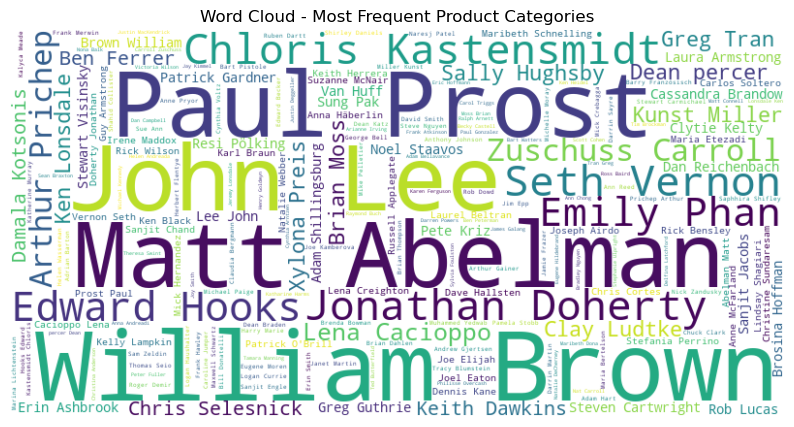

In [ ]:
from wordcloud import WordCloud 
wordcloud = WordCloud(width=800, height=400, background_color='white').\
            generate(' '.join(df['Customer Name'])) 

plt.figure(figsize=(10, 6)) 
plt.imshow(wordcloud, interpolation='bilinear') 
plt.axis('off') 
plt.title('Word Cloud - Most Frequent Product Categories') 
plt.show()

## Visualization 14: Bar Chart - Sales by Age group 


In [ ]:
ecom = pd.read_csv('d:\Work\Cources\AI Academy\G4 Summer offline\Session 10\ecommerce_sales.csv')

In [ ]:
ecom.sample()

,Company_ID,Purchase_Date,Product_Category,Quantity,Total_Sales,Gender,Marital_Status,Price_Per_Unit,Customer_Type,Age
751,3,2021-07-19,Clothing,2,444.526167,Female,Divorced,20.13157,New Customer,29


binning 

categorization 

Age       20 5 16 8 9 23 32 45 65 

AgeGroup  0-20   20-30  30-45  45-60 60-100

In [ ]:
labels = ["<20", "20-30", "30-45", "45-60", ">60"]

# Define the bins and labels for categorization
bins = [0, 20, 30, 45, 60, 100]

# Categorize the ages
ecom['AgeGroup'] = pd.cut(ecom['Age'],
                          bins=bins,
                        labels=labels,
                        #  right=False,
                        #   include_lowest=True
                          )


In [ ]:
ecom['AgeGroup'].value_counts()

AgeGroup
>60      3138
30-45    2434
45-60    2335
20-30    1641
<20       452
Name: count, dtype: int64

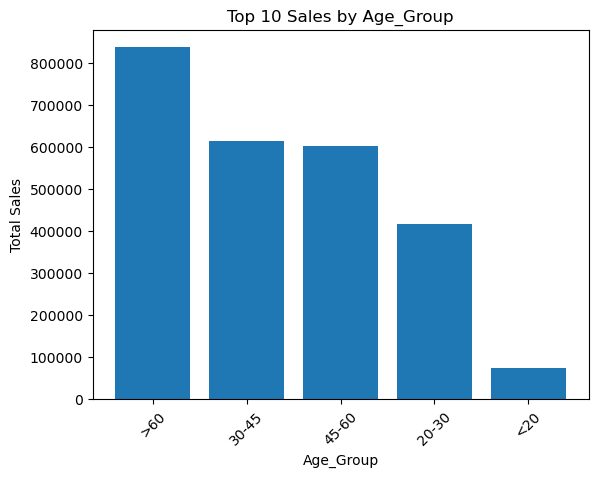

In [ ]:
Age_sales = ecom.groupby('AgeGroup')['Total_Sales'].sum().nlargest(10) 

plt.bar(Age_sales.index, Age_sales.values) 

plt.xticks(rotation=45) 
plt.xlabel('Age_Group') 
plt.ylabel('Total Sales') 
plt.title('Top 10 Sales by Age_Group') 
plt.show()

## Visualization 15: Stacked Line Plot - Sales Trend by Customer Type and Gender 
This line plot displays the total sales trend over time for different customer types (e.g., new customers, returning customers), categorized by gender. It provides insights into how sales are evolving over time for different customer segments.

In [ ]:
df.sample()

,Row ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
7401,7402,2016-09-08,2016-09-13,Standard Class,TR-21325,Toby Ritter,Consumer,United States,Seattle,Washington,98103,West,OFF-PA-10002615,Office Supplies,Paper,"Ampad Gold Fibre Wirebound Steno Books, 6"" x 9...",30.87,7,0.0,14.2002


In [ ]:
customer_type_gender_sales = df.pivot_table(index='Ship Date',
                                             columns=['Category'],#, 'Segment'],
                                               values='Sales',
                                                 aggfunc='sum')

In [ ]:
customer_type_gender_sales

Category,Furniture,Office Supplies,Technology
Ship Date,,,
2014-01-07,NaN,29.228,NaN
2014-01-08,NaN,307.500,NaN
2014-01-10,2573.8200,653.120,1147.940
2014-01-12,76.7280,29.966,NaN
2014-01-13,NaN,9.344,31.200
...,...,...,...
2018-01-01,1970.7228,419.432,NaN
2018-01-02,469.4280,773.820,302.376
2018-01-03,323.1360,155.208,90.930


In [ ]:
customer_type_gender_sales.resample('M').sum()

Category,Furniture,Office Supplies,Technology
Ship Date,,,
2014-01-31,5618.8590,4512.982,3143.290
2014-02-28,2463.3240,1334.694,1608.510
2014-03-31,11468.0530,7363.426,31876.870
2014-04-30,10189.4560,10597.021,9601.988
2014-05-31,7418.6160,8488.816,6571.448
2014-06-30,12247.1356,12276.337,11468.183
2014-07-31,9865.7040,16091.680,7033.210
2014-08-31,9405.4000,10891.268,9948.574
2014-09-30,19658.4753,23314.780,30153.398


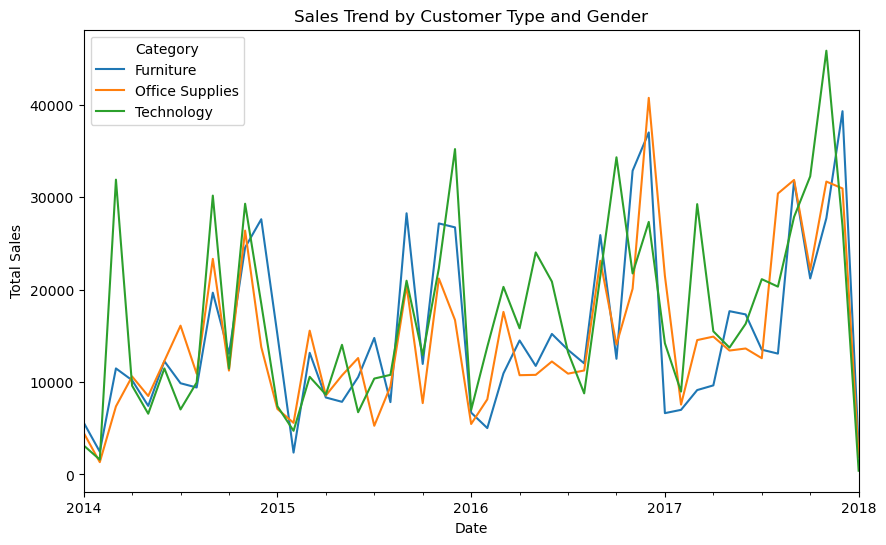

In [ ]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
customer_type_gender_sales = df.pivot_table(index='Ship Date',
                                             columns=['Category'],#, 'Segment'],
                                               values='Sales',
                                                 aggfunc='sum')

customer_type_gender_sales.resample('M').sum().plot(kind='line', figsize=(10, 6))
plt.xlabel('Date') 
plt.ylabel('Total Sales') 
plt.title('Sales Trend by Customer Type and Gender') 
plt.show()

## Visualization 16: Clustered Count Plot - Sales by Month and Customer Type 
The count plot shows the number of sales made in each month, categorized by customer type (e.g., new customers, returning customers). It helps understand the monthly sales patterns for different customer segments

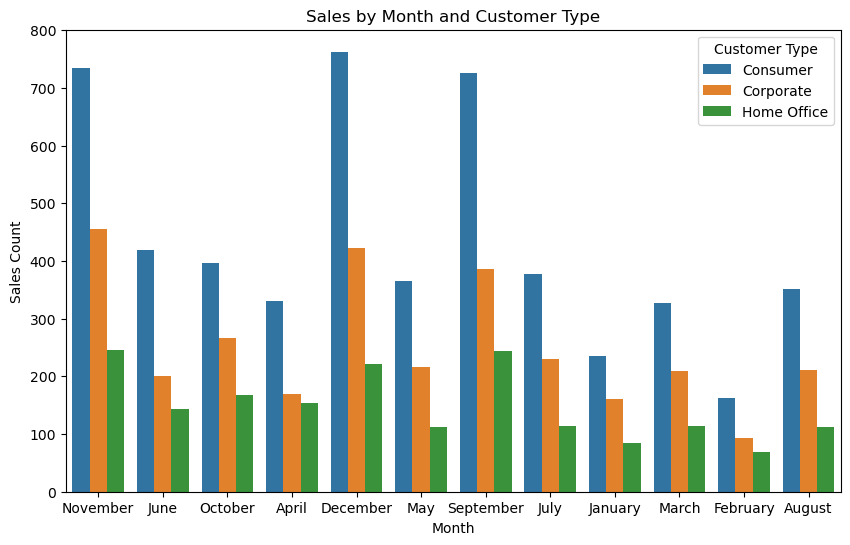

In [ ]:
df['Month'] = df['Ship Date'].dt.month_name()
 
plt.figure(figsize=(10, 6)) 
sns.countplot(x='Month', hue='Segment', data=df) 
plt.xlabel('Month') 
plt.ylabel('Sales Count') 
plt.title('Sales by Month and Customer Type') 
plt.legend(title='Customer Type', bbox_to_anchor=(1, 1)) 
plt.show()

We finished static visualization 

1- Pandas   plot

2- matplotlib   plt

3- seaborn    sns

# Plotly 

Plotly is a Montreal-based AI and Analytics company. They focus on the development of Analytics tools, mainly Dash and Chart Studio. They have also released the free and open-source plotting library “Plotly” for Python, R, MatLab, and Julia.

Plotly produces interactive graphs, can be embedded on websites, and provides a wide variety of complex plotting options. The graphs and plots are robust, and a wide variety of people can use them. The visuals are of high quality and easy to read and interpret.

Plotly can be used to make a wide variety of charts, including Basic and Statistical charts, Maps, 3D Charts, Subplots, and so on.

In [ ]:
# !pip install plotly

In [ ]:
import numpy as np 
import pandas as pd 

import plotly.express as px

Now, we read some data we will be using.


- Melbourne Housing Snapshot


- The Melbourne Housing data has various real estate data points and deals with the housing sector. The data pertains to the housing and commercial property sector.



In [ ]:
melb= pd.read_csv("d:\Work\Cources\AI Academy\G4 Summer offline\Session 9\Visualizations\melb_data.csv")
melb.shape

(13580, 21)

In [ ]:
melb.sample(2)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
10559,Wheelers Hill,5 Rubens Ct,4,h,1035000.0,S,Win,27/05/2017,16.7,3150.0,...,2.0,2.0,702.0,NaN,NaN,Monash,-37.91075,145.18758,South-Eastern Metropolitan,7392.0
3569,Kensington,1/5 Wight St,2,t,773000.0,S,Rendina,26/07/2016,4.2,3031.0,...,1.0,1.0,0.0,90.0,1970.0,Melbourne,-37.79370,144.92950,Northern Metropolitan,5263.0


The Melbourne data is a bit large. For the sake of simplicity, we are taking only 1000 data points from the dataset.

In [ ]:
# melb = melb.sample(1000,random_state=2006)
# melb.head()

## Visualization 17: Scatter Plots Using Plotly 

In [ ]:
x=[0, 1, 2, 3, 4, 5, 6]
y=[0, 2, 4, 5, 5.5, 7, 9]
fig = px.scatter(x, y)
fig.show()

## Visualization 18: Scatter Plots Using Plotly 

In [ ]:
fig = px.scatter(melb, y="Lattitude", x="Longtitude",  # Numerical
                 
                        color="Regionname", # hue  # Categorical
                        
                        width =600,height = 600,
                        
                        # marginal_y="histogram", marginal_x="rug"
                        )
# fig.update_layout(scene_aspectmode='data')
# plt.figure(figsize=(3,2))
fig.show()

## Visualization 19: Scatter Plots multiple features 

In [ ]:
fig = px.scatter(melb, x="Price",width =600,height = 600,
                 y="YearBuilt", color="Type",
                   facet_col="Rooms", #Categorical
                     )
fig.show()

## Visualization 20: Scatter Plots with Price and year with color = room 

In [ ]:
# melb['Rooms'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1000 entries, 11028 to 7758
Series name: Rooms
Non-Null Count  Dtype
--------------  -----
1000 non-null   int64
dtypes: int64(1)
memory usage: 15.6 KB


In [ ]:
# melb['Rooms'] = melb['Rooms'].astype('category')
# melb['Rooms'].info()

<class 'pandas.core.series.Series'>
Int64Index: 1000 entries, 11028 to 7758
Series name: Rooms
Non-Null Count  Dtype   
--------------  -----   
1000 non-null   category
dtypes: category(1)
memory usage: 9.1 KB


In [ ]:
fig = px.scatter(melb, x="Price", y="YearBuilt", color="Rooms",
             facet_col="Type",
             width =600,height = 600, )
fig.show()

## Visualization 21: Scatter Plots with BuildingArea and Distance with color = Car 

In [ ]:
fig = px.scatter(melb,width =600,height = 600, x="BuildingArea", y="Distance",
                  color="Car",
                   facet_col="Type", )
fig.show()

## Visualization 22: Scatter Plots with BuildingArea and Distance with color = rooms 

In [ ]:
fig = px.scatter(melb, x="BuildingArea",width =600,height = 600,
                  y="Distance", color="Rooms", facet_col="Type", )
fig.show()

## Visualization 23: Regarding scatterplots,  Linear Regression plots using Plotly.
 We take the dips dataset, and we plot the linear relationship between total bills and tips.

In [ ]:
import plotly.express as px

In [ ]:
#linear regression
df = px.data.tips()   #Download data from plotly

fig = px.scatter(df,
                 width =450,height = 300,
                 x="total_bill", y="tip",
                 trendline="ols"
                 )  # Ordianry least square
fig.show()

## Visualization 24-28:Line Plots Using Plotly

Line plots are great for visualizing continuous data. Time series data, mathematical functions, etc., are some of the data which can be plotted using Line Plots. They reveal data trends, maxima, and minima. We can use them for time series data like stocks, sales over time, and so on. It is a great way to plot a 2D relationship.

In [ ]:
x = np.linspace(0, 10, 1000)
y= 3*x**2 - 2*x**2 + 4*x- 5
fig = px.line(x=x ,y =y,labels={'x':'x', 'y':'y'})
fig.show()

In [ ]:
x = np.linspace(0, 10, 1000)
y= np.sin(x)
fig = px.line(x=x ,y =y,labels={'x':'x', 'y':'sin(x)'})
fig.show()

In [ ]:
px.data.stocks()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708
...,...,...,...,...,...,...,...
100,2019-12-02,1.216280,1.546914,1.425061,1.075997,1.463641,1.720717
101,2019-12-09,1.222821,1.572286,1.432660,1.038855,1.421496,1.752239
102,2019-12-16,1.224418,1.596800,1.453455,1.104094,1.604362,1.784896
103,2019-12-23,1.226504,1.656000,1.521226,1.113728,1.567170,1.802472


In [ ]:
df1 = px.data.stocks()
fig = px.line(df1,
               x='date',
                 y="MSFT")
fig.show()

In [ ]:
df2 = df1[df1['date'] > '2018-06-01']
fig = px.line(df2, x='date', y=["MSFT",'FB'])
fig.show()

In [ ]:
#create dataframe from stocks  using plotly
# plot microsoft and apple 
# date 6-2018 to last


In [ ]:
df1 = px.data.stocks()
df1.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


Now, I will include more stocks in the plot.

GOOG stands for Google, FB stands for Facebook, and AMZN stands for Amazon

In [ ]:
df1 = px.data.stocks()
fig = px.line(df1, x='date', y=df1.columns)#["MSFT","GOOG",'FB',"AMZN"])
fig.show()
